In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = load_digits() # digits_dataset – словарь

In [4]:
data.keys() # нас интересует data, target, target_names и images

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [5]:
data.data.shape

(1797, 64)

Таргеты это цифры уникальные через np от 0 до 9

In [6]:
np.unique(data['target'])


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [7]:
data.images.shape

(1797, 8, 8)

С помощью цикла посмотрим через матплотлиб картинки, первые три, которые содержаться в дата,сете, с помощью cmap=plt.cm.binary сделаем в черно белом

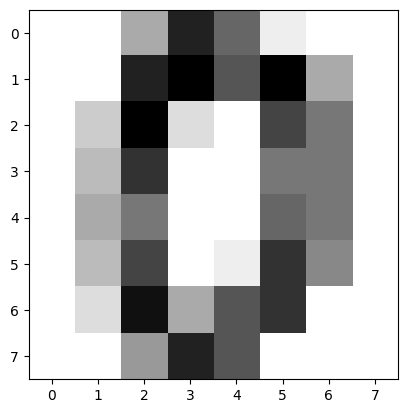

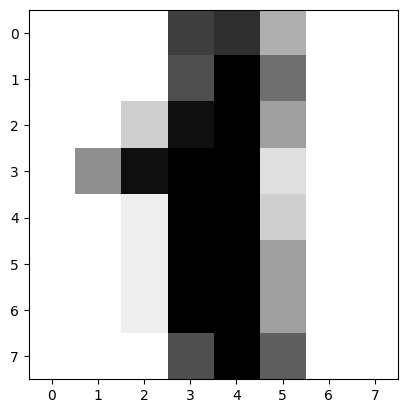

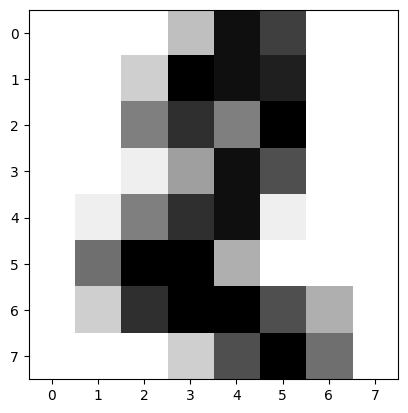

In [8]:
for image in data.images[:3]:
    plt.imshow(image, cmap=plt.cm.binary)
    plt.show()


Всего 8х8 пикселей, максимально 16

In [9]:
np.max(data.images)


np.float64(16.0)

Разбиваем данные на обучение и тест

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.5)

In [11]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((898, 64), (899, 64), (898,), (899,))

In [12]:
classifier = KNeighborsClassifier(algorithm="brute")

In [13]:
classifier.fit(X_train, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'brute'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
y_pred = classifier.predict(X_test)

In [15]:
y_pred

array([0, 9, 7, 3, 5, 0, 3, 4, 4, 0, 1, 6, 8, 6, 7, 3, 4, 5, 8, 8, 1, 4,
       8, 8, 0, 3, 5, 1, 0, 1, 6, 1, 2, 9, 3, 8, 0, 7, 9, 1, 8, 2, 6, 4,
       0, 8, 4, 6, 2, 7, 8, 7, 8, 4, 8, 6, 6, 8, 1, 4, 4, 8, 6, 4, 3, 7,
       9, 5, 7, 9, 5, 3, 0, 0, 2, 4, 8, 1, 9, 2, 4, 6, 5, 5, 5, 7, 9, 1,
       7, 2, 8, 6, 6, 0, 1, 9, 9, 8, 0, 5, 3, 3, 3, 9, 5, 3, 7, 1, 6, 9,
       4, 2, 7, 4, 5, 4, 5, 6, 9, 5, 5, 4, 1, 2, 3, 6, 5, 2, 6, 4, 6, 0,
       2, 5, 9, 9, 3, 2, 6, 9, 0, 0, 7, 4, 3, 4, 4, 5, 8, 4, 0, 2, 6, 2,
       3, 4, 8, 5, 2, 3, 8, 3, 7, 7, 0, 8, 7, 4, 5, 6, 8, 1, 6, 4, 3, 7,
       3, 1, 2, 1, 8, 5, 5, 0, 0, 1, 9, 4, 4, 9, 3, 7, 6, 9, 1, 3, 1, 4,
       5, 7, 7, 1, 1, 5, 4, 0, 5, 3, 0, 5, 2, 1, 1, 2, 3, 7, 1, 9, 1, 9,
       6, 8, 0, 4, 8, 1, 6, 0, 2, 4, 6, 1, 2, 8, 9, 5, 0, 3, 3, 4, 9, 0,
       2, 5, 5, 5, 0, 6, 0, 8, 2, 7, 9, 5, 9, 4, 8, 6, 2, 3, 7, 0, 1, 5,
       8, 4, 4, 4, 6, 2, 7, 9, 1, 5, 3, 3, 5, 7, 2, 9, 6, 3, 4, 8, 7, 9,
       9, 8, 2, 2, 7, 0, 4, 6, 8, 6, 4, 1, 7, 2, 2,

In [16]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.96      1.00      0.98        78
           2       0.99      1.00      0.99        89
           3       0.96      0.99      0.97        92
           4       1.00      0.98      0.99        95
           5       0.98      0.98      0.98        99
           6       0.98      1.00      0.99        92
           7       0.98      1.00      0.99        84
           8       0.98      0.93      0.95        89
           9       0.98      0.93      0.95        97

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [17]:
classifier = KNeighborsClassifier(n_neighbors=500, algorithm="brute")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.33      1.00      0.49        84
           1       0.56      0.47      0.51        78
           2       0.89      0.27      0.41        89
           3       0.43      0.89      0.58        92
           4       0.88      0.16      0.27        95
           5       0.91      0.30      0.45        99
           6       0.46      0.50      0.48        92
           7       0.55      0.94      0.69        84
           8       0.74      0.45      0.56        89
           9       0.78      0.07      0.13        97

    accuracy                           0.49       899
   macro avg       0.65      0.51      0.46       899
weighted avg       0.66      0.49      0.45       899



In [18]:
confusion = confusion_matrix(y_test, y_pred)


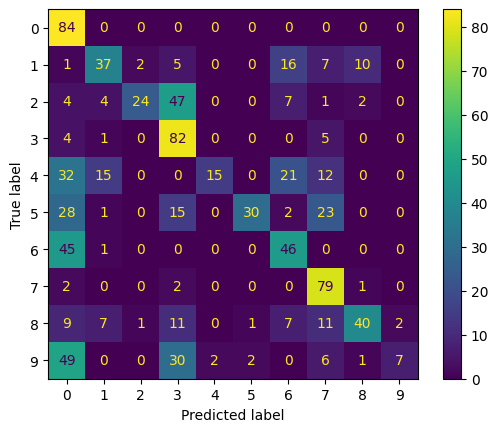

In [19]:
display = ConfusionMatrixDisplay(confusion_matrix=confusion)
display.plot()
plt.show()

In [20]:
report_dict = classification_report(y_test, y_pred, output_dict=True)

In [21]:
np.mean([report_dict[str(label)]["f1-score"] for label in range(10)])

np.float64(0.45849513285967747)

In [22]:
nom = np.sum([report_dict[str(label)]["f1-score"] * report_dict[str(label)]["support"]  for label in range(10)])
denom = np.sum([report_dict[str(label)]["support"] for label in range(10)])

nom / denom

np.float64(0.4525844933883718)

Приступим к перебору гиперпараметров

In [23]:
params_grid = {
    "n_neighbors" : [1, 2, 5, 10, 25, 100],
    "weights" : ["uniform", "distance"],
    "p": [0, 1, 2, 3, 5, 10]
}

knn = KNeighborsClassifier(algorithm="brute")
cv = GridSearchCV(knn, params_grid)

cv.fit(X_train, y_train)

/Users/dmitrybertnikov/Desktop/ds_learn/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py:516: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/dmitrybertnikov/Desktop/ds_learn/.venv/lib/python3.13/site-packages/sklearn/model_selection/_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/dmitrybertnikov/Desktop/ds_learn/.venv/lib/python3.13/site-packages/sklearn/base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File

,estimator,KNeighborsCla...rithm='brute')
,param_grid,"{'n_neighbors': [1, 2, ...], 'p': [0, 1, ...], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,1


In [24]:
cv.best_params_

{'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}

In [25]:
cv.best_score_

np.float64(0.9855307262569832)

In [26]:
classifier = KNeighborsClassifier(n_neighbors=1, algorithm="brute", p=3, weights="uniform")
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.96      1.00      0.98        78
           2       1.00      1.00      1.00        89
           3       0.97      0.96      0.96        92
           4       1.00      0.99      0.99        95
           5       0.99      0.98      0.98        99
           6       0.99      1.00      0.99        92
           7       0.99      1.00      0.99        84
           8       0.97      0.98      0.97        89
           9       0.97      0.94      0.95        97

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899



In [27]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        84
           1       0.96      1.00      0.98        78
           2       1.00      1.00      1.00        89
           3       0.97      0.96      0.96        92
           4       1.00      0.99      0.99        95
           5       0.99      0.98      0.98        99
           6       0.99      1.00      0.99        92
           7       0.99      1.00      0.99        84
           8       0.97      0.98      0.97        89
           9       0.97      0.94      0.95        97

    accuracy                           0.98       899
   macro avg       0.98      0.98      0.98       899
weighted avg       0.98      0.98      0.98       899

